# Readme
This is an example of polynomial regression done for educational purposes. The goal is to predict target variable based on input values.

# Create data

In [1]:
import numpy as np
import matplotlib.pyplot as plt

Text(0, 0.5, 'y')

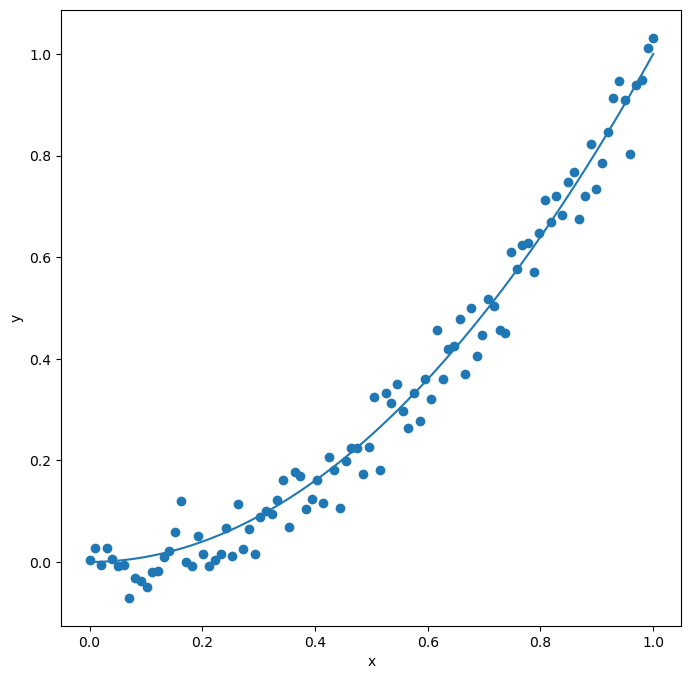

In [2]:
# create x and y
x = np.linspace(0, 1, 100)
y_ideal = x**2
# add some random error to y
y = y_ideal + np.random.normal(loc=0., scale=0.05, size=y_ideal.shape)

# visualize
plt.figure(figsize=[8,8])
plt.scatter(x, y)
plt.plot(x,y_ideal)
plt.xlabel('x')
plt.ylabel('y')

# Predictions

## Create linear prediction

In [3]:
from sklearn.linear_model import LinearRegression

In [4]:
x[:10]

array([0.        , 0.01010101, 0.02020202, 0.03030303, 0.04040404,
       0.05050505, 0.06060606, 0.07070707, 0.08080808, 0.09090909])

In [5]:
x = x.reshape(-1,1)
x[:10]

array([[0.        ],
       [0.01010101],
       [0.02020202],
       [0.03030303],
       [0.04040404],
       [0.05050505],
       [0.06060606],
       [0.07070707],
       [0.08080808],
       [0.09090909]])

In [6]:
reg = LinearRegression().fit(x, y)

In [7]:
print(reg.coef_, reg.rank_, reg.singular_, reg.intercept_)

[1.01257835] 1 [2.91576465] -0.1802171904728076


In [8]:
y_pred = reg.predict(x)

## Create polynomial prediction

In [9]:
from sklearn.preprocessing import PolynomialFeatures

poly = PolynomialFeatures(degree=2)
x_poly = poly.fit_transform(x)

In [10]:
poly_reg = LinearRegression().fit(x_poly, y)

In [11]:
y_poly_pred = poly_reg.predict(x_poly)

In [12]:
print(poly_reg.coef_)
print(poly_reg.intercept_)

[ 0.         -0.00694353  1.01952188]
-0.012013243888985281


### Explore polynomial features

In [43]:
x_poly.shape

(100, 3)

In [24]:
x_poly[:5]

array([[1.00000000e+00, 0.00000000e+00, 0.00000000e+00],
       [1.00000000e+00, 1.01010101e-02, 1.02030405e-04],
       [1.00000000e+00, 2.02020202e-02, 4.08121620e-04],
       [1.00000000e+00, 3.03030303e-02, 9.18273646e-04],
       [1.00000000e+00, 4.04040404e-02, 1.63248648e-03]])

In [59]:
x_cont = np.concatenate((x,x**2), axis=1)
x_cont;

## Visualize predictions

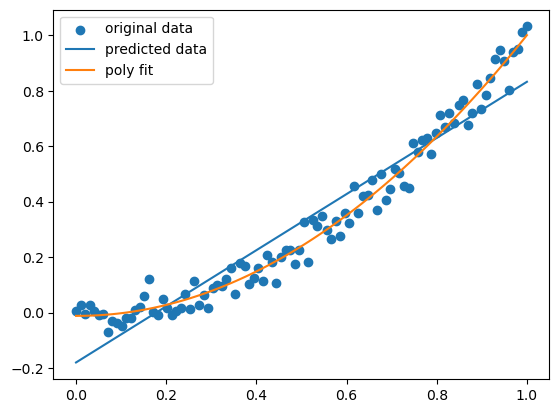

In [14]:
plt.scatter(x,y, label='original data')
plt.plot(x,y_pred, label='predicted data')
plt.plot(x, y_poly_pred, label='poly fit')
plt.legend()

# R squared

R squared (R^2), coefficient of determination. I will calculate it from built-in function and "manually".

## Build-in

In [15]:
reg.score(x, y)

0.9171951787601719

In [16]:
poly_reg.score(x_poly, y)

0.9804162996487383

## Manual calculation

In [17]:
# sum of squares of residuals
rss = np.sum( (y - reg.predict(x))**2 )

In [18]:
# total sum of squares
tss = np.sum( (y - np.mean(y))**2 )

In [19]:
1 - rss/tss

0.9171951787601719